In [4]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import itertools as it

In [6]:
import abide_motion_wrapper as amw
reload(amw)

<module 'abide_motion_wrapper' from 'abide_motion_wrapper.pyc'>

u'/Users/julia/Desktop/kids/Motion'

In [13]:
columns = [ 'motion_thresh', 'med_rsq', 'CI_95', 'n', 'age_l', 'age_u' ]
results_df = pd.DataFrame(columns = columns)

for f in glob('RESULTS/*csv'):
    temp_df = pd.read_csv(f, index_col=0)
    results_df = results_df.append(temp_df)

results_df.to_csv('RESULTS/SummaryRsqs.csv', index=None, columns=columns)

In [15]:
df = pd.read_csv('RESULTS/SummaryRsqs.csv')
#df = df.loc[df]
df.describe()

,motion_thresh,med_rsq,CI_95,n,age_l,age_u
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,3.869822,0.922262,0.051400,147.041420,10.485207,13.485207
std,1.601865,0.049909,0.050682,83.272831,2.873944,2.873944
min,2.000000,0.642851,0.006132,10.000000,6.000000,9.000000
25%,2.000000,0.908317,0.023323,80.000000,8.000000,11.000000
50%,4.000000,0.937490,0.038492,150.000000,10.000000,13.000000
75%,6.000000,0.949797,0.059318,220.000000,13.000000,16.000000
max,6.000000,0.972548,0.669480,300.000000,15.000000,18.000000


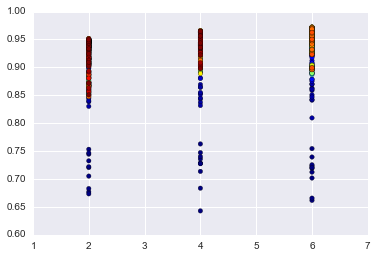

In [19]:
plt.scatter(df.loc[:, "motion_thresh"], df.loc[:, "med_rsq"], c=df.loc[:, "n"], cmap='jet', )



/Users/julia/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2.0, right=2.0
  'left=%s, right=%s') % (left, right))


IndexError: index 1 is out of bounds for axis 0 with size 1

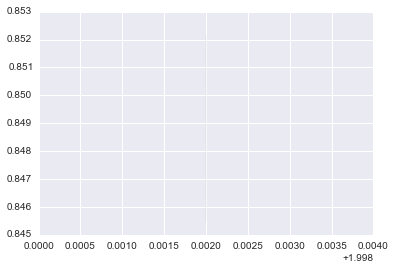

In [16]:
sns.tsplot(data=df.loc[df['n']==20, :], time='motion_thresh', value='med_rsq')